# Tests for different number of articles

In [ ]:
%load_ext autoreload
%autoreload 2
# %config IPCompleter.greedy=True

from bandits import LinUCB, Ucb1, Egreedy
from evaluator import evaluate
from matplotlib import pyplot as plt

In [2]:
%%time
import dataset
# files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502")
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502","dataset/R6/ydata-fp-td-clicks-v1_0.20090503")
dataset.get_yahoo_events(files)

7646058 events with 62 articles
CPU times: user 4min 30s, sys: 6.28 self, total: 4min 36s
Wall time: 4min 37s


In [ ]:
# articles_all, features_all, events_all = list(dataset.articles),np.copy(dataset.features),copy.deepcopy(dataset.events)

In [3]:
def test_max_articles(max_articles):
    dataset.max_articles(max_articles)
    _, dep_ctrs = evaluate(Egreedy(1))
    rnd_ctr = dep_ctrs[-1]
    
    bandits = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.1)]
    alg_names = [x.algorithm for x in bandits]
    
    ctrs = []
    for bandit in bandits:
        _, deploy_ctrs = evaluate(bandit)
        ctrs.append(deploy_ctrs[-1]/rnd_ctr)
    
    plt.bar(alg_names, ctrs)
    plt.ylabel("CTR Lift")
    plt.title(str(max_articles)+" articles")
    plt.show()

Number of events: 6904018
Egreedy (ε=1)       0.0309    49.4s
Egreedy (ε=0.1)     0.0382    24.3s
UCB1 (α=0.1)        0.0328    49.3s
LinUCB (α=0.1)      0.04      22.0m


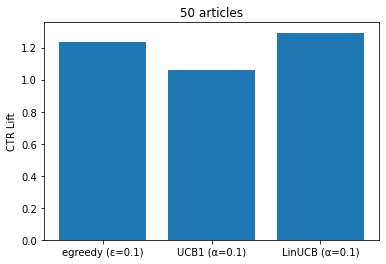

In [4]:
# dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(50)

Number of events: 2549940
Egreedy (ε=1)       0.0283    18.3s
Egreedy (ε=0.1)     0.0343    8.2s
UCB1 (α=0.1)        0.0353    16.0s
LinUCB (α=0.1)      0.0518    4.2m


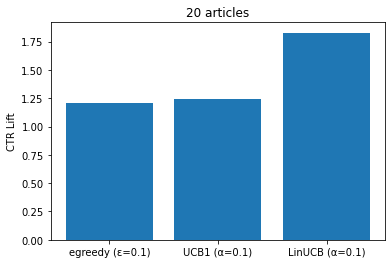

In [5]:
# dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(20)

Number of events: 1093827
Egreedy (ε=1)       0.035     8.0s
Egreedy (ε=0.1)     0.0443    3.8s
UCB1 (α=0.1)        0.0344    7.1s
LinUCB (α=0.1)      0.0371    1.3m


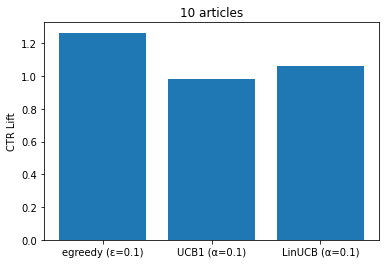

In [6]:
# dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(10)

Number of events: 419947
Egreedy (ε=1)       0.0323    3.2s
Egreedy (ε=0.1)     0.0445    1.5s
UCB1 (α=0.1)        0.0428    2.9s
LinUCB (α=0.1)      0.048     23.8s


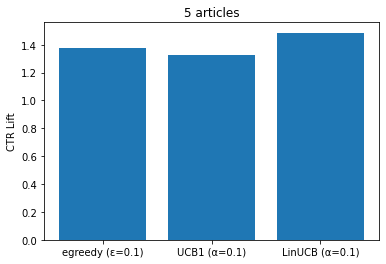

In [7]:
# dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(5)